# Exploratory Data Analysis

---

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization
5. Hypothesis investigation

---


## I. Import packages

In [964]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## II. Loading data with Pandas

We need to load `Test_data.csv` and `pharma_data.csv` into individual dataframes so that we can work with them in Python

In [965]:
#Importing datasets
pharma_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv")
Test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv")

Looking at the first 5 rows of both dataframes to see what the data looks like

In [966]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [967]:
Test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


With the `pharma_data.csv`, we have a mix of numeric, categorical data and null values which we will need to transform before modelling.

---

## III. Descriptive statistics of data

### Data types

In [968]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [969]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


The describe method gives us a lot of information about the data. The key point to take away from this is that we some  data, as exhibited by std

### Missing Values

In [970]:
#Checking for null values
pharma_data.isna().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

Here, we can see that a handful of columns has null values present.

In [971]:
# Filling null values with the next value on the column
pharma_data.Treated_with_drugs.fillna(method = "pad",inplace = True)
pharma_data.A.fillna(method = "pad",inplace = True)
pharma_data.B.fillna(method = "pad",inplace = True)
pharma_data.C.fillna(method = "pad",inplace = True)
pharma_data.D.fillna(method = "pad",inplace = True)
pharma_data.E.fillna(method = "pad",inplace = True)
pharma_data.F.fillna(method = "pad",inplace = True)
pharma_data.Z.fillna(method = "pad",inplace = True)

In [972]:
# Summing all our columns and using those values as Number_of_prev
cols = pharma_data[["A","B","C","D","E","F","Z"]]
cols = cols.sum(axis = 1)
pharma_data.Number_of_prev_cond = cols

In [973]:
#Now there are no null values
pharma_data.isna().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

---
## IV. Data visualization

Now let's create meaning and conclusions from the dataframes

### 1. Percentage of Survival

In [974]:
survived = pharma_data[["ID_Patient_Care_Situation","Survived_1_year"]]
survived.columns = ["Patients","Survived"]
survived_total = survived.groupby(["Survived"]).count().sort_values(by = "Patients",ascending=False)
survived_percent = (survived_total/survived_total.sum())*100
survived_percent

,Patients
Survived,
1,63.224661
0,36.775339


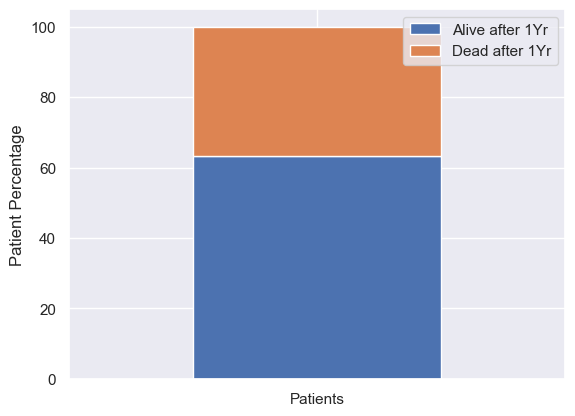

In [975]:
survived_percent.transpose().plot.bar(stacked = True,rot = 0)
plt.ylabel("Patient Percentage")
plt.legend(["Alive after 1Yr","Dead after 1Yr"],loc = "upper right")
plt.show()

About 36% of the total number are dead (8934 patients)


### 2. Patients who smoke

Let's see the distribution of the patients who smoke. Since the  data is uni-variate, let's use histograms to visualize their distribution.

In [976]:
#There are rows that indicate "Cannot Say". Let's convert all the "Cannot Say" categories to YES OR NO
pharma_data.Patient_Smoker.replace("Cannot say","YES",inplace = True)
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX1,128,1.348400,YES,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [977]:
smokers = pharma_data[["ID_Patient_Care_Situation","Patient_Smoker","Survived_1_year"]]
smokers.columns = ["id","Patient_Smoker","Survived"]
smoker_total = smokers.groupby([smokers["Patient_Smoker"],smokers["Survived"]])["id"].count().unstack()
smoker_percent =  (smoker_total.div(smoker_total.sum(axis = 1),axis = 0)*100).sort_values(by = 0,ascending = False)
smoker_percent

Survived,0,1
Patient_Smoker,,
YES,50.908537,49.091463
NO,26.264533,73.735467


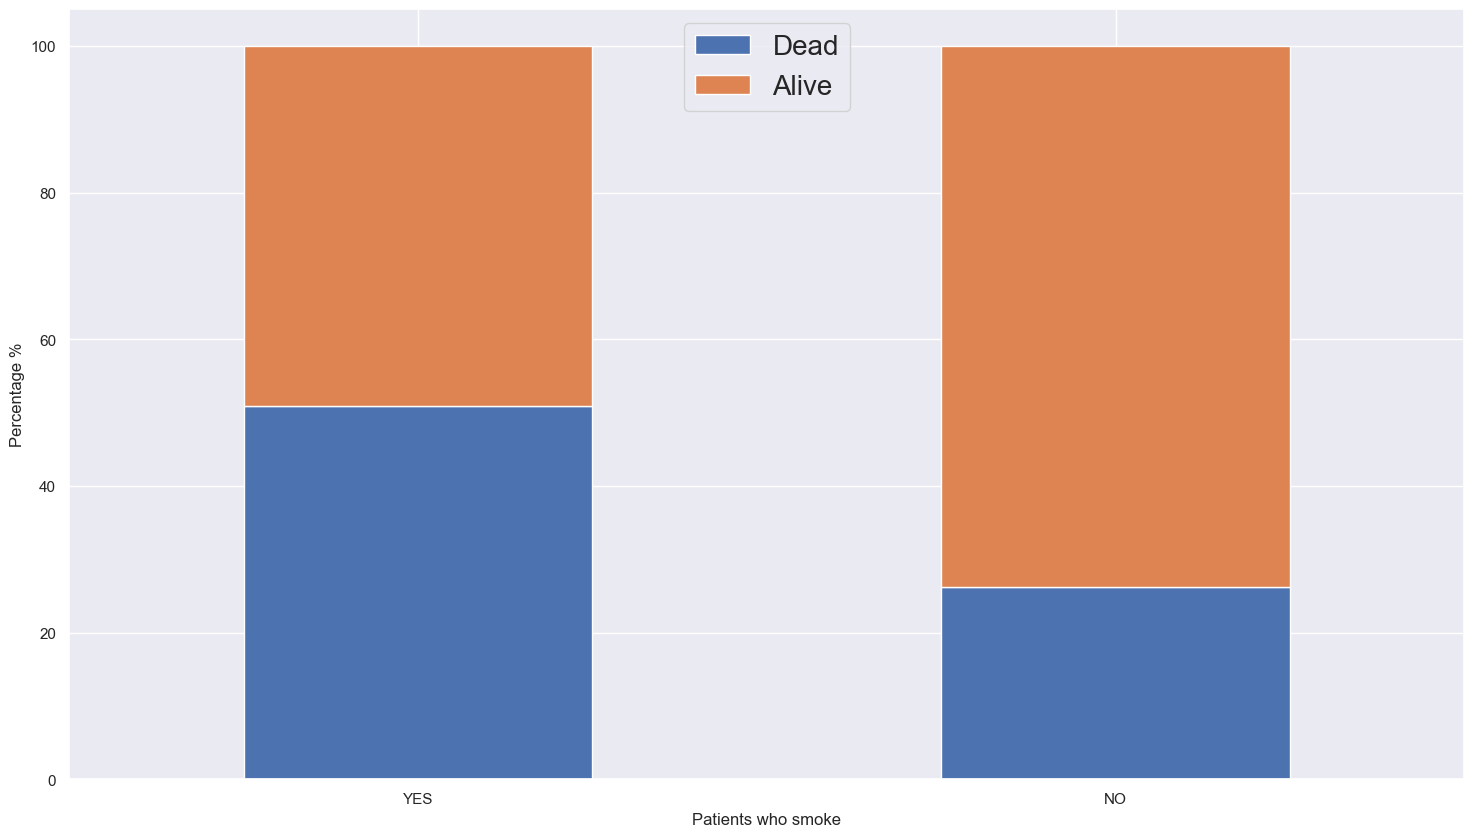

In [978]:
smoker_percent.plot.bar(stacked = True,rot =0,figsize=(18,10))
plt.ylabel("Percentage %")
plt.xlabel("Patients who smoke")
plt.legend(["Dead","Alive"],loc = "upper center",fontsize =20)
plt.show()

Smoking doesn't affect the rate of a patient's survival that much
 - 49% of smokers died as 51% of the same smokers survived
 - 26% of non-smokers dies as 73% of the same non-smokers survived

### 3. RURAL or URBAN community

In [979]:
Rural_urban = pharma_data[["ID_Patient_Care_Situation","Patient_Rural_Urban","Survived_1_year"]]
Rural_urban.columns = ["id","Patient_Rural_Urban","Survival"]
Rural_urban_total = Rural_urban.groupby([Rural_urban["Patient_Rural_Urban"],Rural_urban["Survival"]])["id"].count().unstack()
Rural_urban_percent = (Rural_urban_total.div(Rural_urban_total.sum(axis = 1),axis = 0)*100).sort_values(by = 0,ascending = False)
Rural_urban_percent

Survival,0,1
Patient_Rural_Urban,,
URBAN,45.052420,54.947580
RURAL,33.203173,66.796827


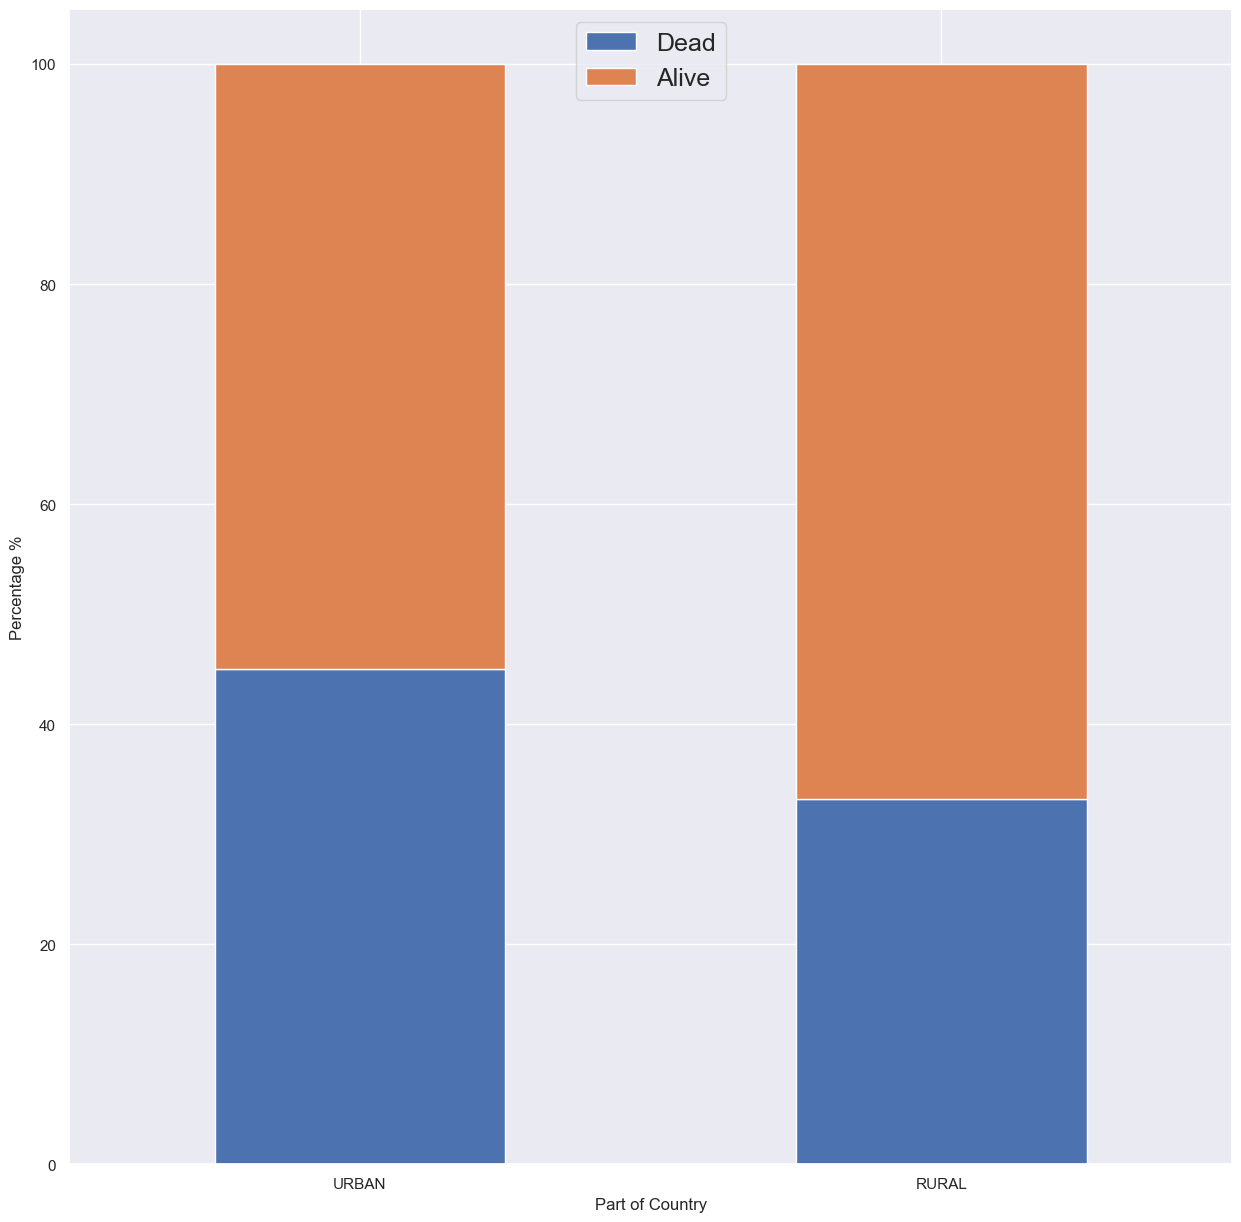

In [980]:
Rural_urban_percent.plot.bar(stacked = True,rot = 0,figsize=(15,15))
plt.legend(["Dead","Alive"],loc = "upper center",fontsize =18)
plt.ylabel("Percentage %")
plt.xlabel("Part of Country")
plt.show()

Rural
- 66% of Rural Residents survived
- 33% of Urban Residents died

Urban
- 54% of Urban Residents survived
- 45% of Urban Residents died


### 4. Patients with previous category of condition

In [981]:
Prev_con = pharma_data[["ID_Patient_Care_Situation","Number_of_prev_cond","Survived_1_year"]]
Prev_con.columns = ["id","Previous_con","Survival"]
Prev_con_total = Prev_con.groupby([Prev_con["Previous_con"],Prev_con["Survival"]])["id"].count().unstack()
Prev_con_percent = (Prev_con_total.div(Prev_con_total.sum(axis = 1),axis = 0)*100).sort_values(by = 0,ascending = True)
Prev_con_percent

Survival,0,1
Previous_con,,
1.0,34.208673,65.791327
2.0,36.542508,63.457492
3.0,41.757898,58.242102
4.0,59.761905,40.238095
5.0,94.594595,5.405405


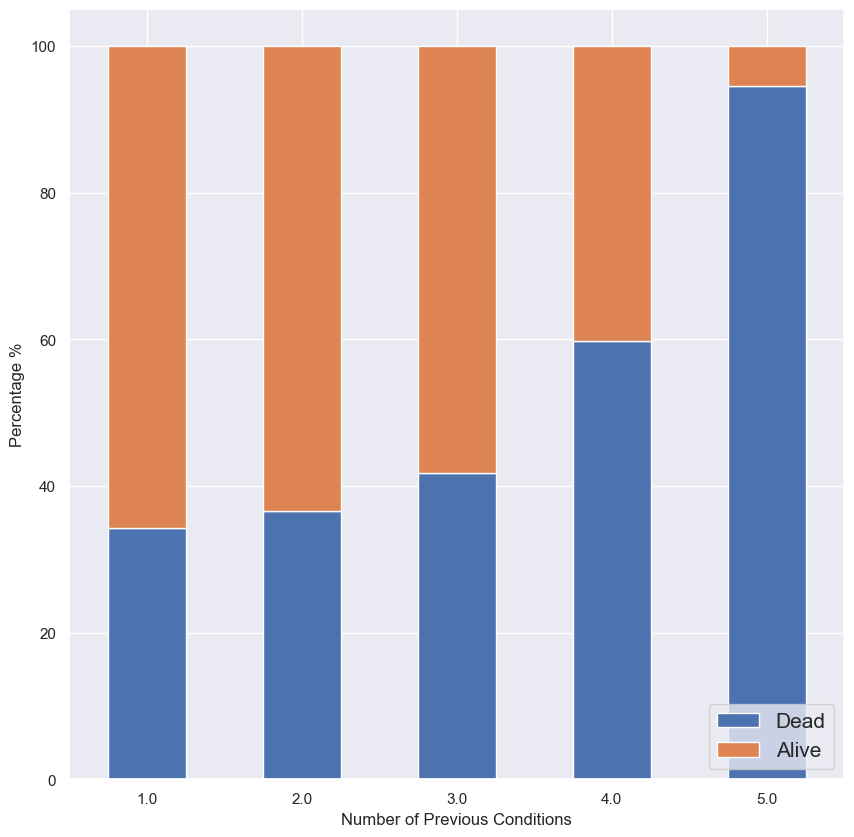

In [982]:
Prev_con_percent.plot.bar(stacked = True,rot = 0,figsize=(10,10))
plt.legend(["Dead","Alive"],loc = "lower right",fontsize = 15)
plt.ylabel("Percentage %")
plt.xlabel("Number of Previous Conditions")
plt.show()


---
This clearly shows the relationship between number of previous conditions and rate of survival
The more the number of previous conditions, the more the rate to death
- 94% of those with 5 previous conditions died
- 59% of those with 4 previous conditions died
- 41% of those with 3 previous conditions died
- 36% of those with 2 previous conditions died
- 34% of those with 1 previous condition died


### 5. Different Category of Previous Conditions

In [983]:
cat_prev_condition = pharma_data[["ID_Patient_Care_Situation","A","B","C","D","E","F","Z"]]
cat_prev_condition = cat_prev_condition.replace(0,np.nan)
cat_prev_condition["Survival"] = pharma_data.Survived_1_year
cat_prev_condition

,ID_Patient_Care_Situation,A,B,C,D,E,F,Z,Survival
0,22374,1.0,NaN,NaN,NaN,1.0,NaN,NaN,0
1,18164,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,6283,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5339,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,33012,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...
23092,15613,1.0,1.0,NaN,1.0,1.0,1.0,NaN,0
23093,15503,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
23094,2167,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
23095,31646,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1


In [984]:

a = cat_prev_condition.groupby([cat_prev_condition["A"],cat_prev_condition["Survival"]])["ID_Patient_Care_Situation"].count().unstack()
b = cat_prev_condition.groupby([cat_prev_condition["B"],cat_prev_condition["Survival"]])["ID_Patient_Care_Situation"].count().unstack()
c = cat_prev_condition.groupby([cat_prev_condition["C"],cat_prev_condition["Survival"]])["ID_Patient_Care_Situation"].count().unstack()
d = cat_prev_condition.groupby([cat_prev_condition["D"],cat_prev_condition["Survival"]])["ID_Patient_Care_Situation"].count().unstack()
e = cat_prev_condition.groupby([cat_prev_condition["E"],cat_prev_condition["Survival"]])["ID_Patient_Care_Situation"].count().unstack()
f = cat_prev_condition.groupby([cat_prev_condition["F"],cat_prev_condition["Survival"]])["ID_Patient_Care_Situation"].count().unstack()
z = cat_prev_condition.groupby([cat_prev_condition["Z"],cat_prev_condition["Survival"]])["ID_Patient_Care_Situation"].count().unstack()

In [985]:
a_percent = (a.div(a.sum(axis = 1),axis = 0)*100)
b_percent = (b.div(b.sum(axis = 1),axis = 0)*100)
c_percent = (c.div(c.sum(axis = 1),axis = 0)*100)
d_percent = (d.div(d.sum(axis = 1),axis = 0)*100)
e_percent = (e.div(e.sum(axis = 1),axis = 0)*100)
f_percent = (f.div(f.sum(axis = 1),axis = 0)*100)
z_percent = (z.div(z.sum(axis = 1),axis = 0)*100)

In [986]:
a_percent.index = ["A"]
b_percent.index = ["B"]
c_percent.index = ["C"]
d_percent.index = ["D"]
e_percent.index = ["E"]
f_percent.index = ["F"]
z_percent.index = ["Z"]

In [987]:
sets = [a_percent,b_percent,c_percent,d_percent,e_percent,f_percent,z_percent]
result = pd.concat(sets).sort_values(by = 1,ascending=False)
result

Survival,0,1
Z,NaN,100.000000
E,35.713500,64.286500
F,36.237785,63.762215
A,37.549426,62.450574
C,39.812646,60.187354
B,42.393380,57.606620
D,53.042122,46.957878


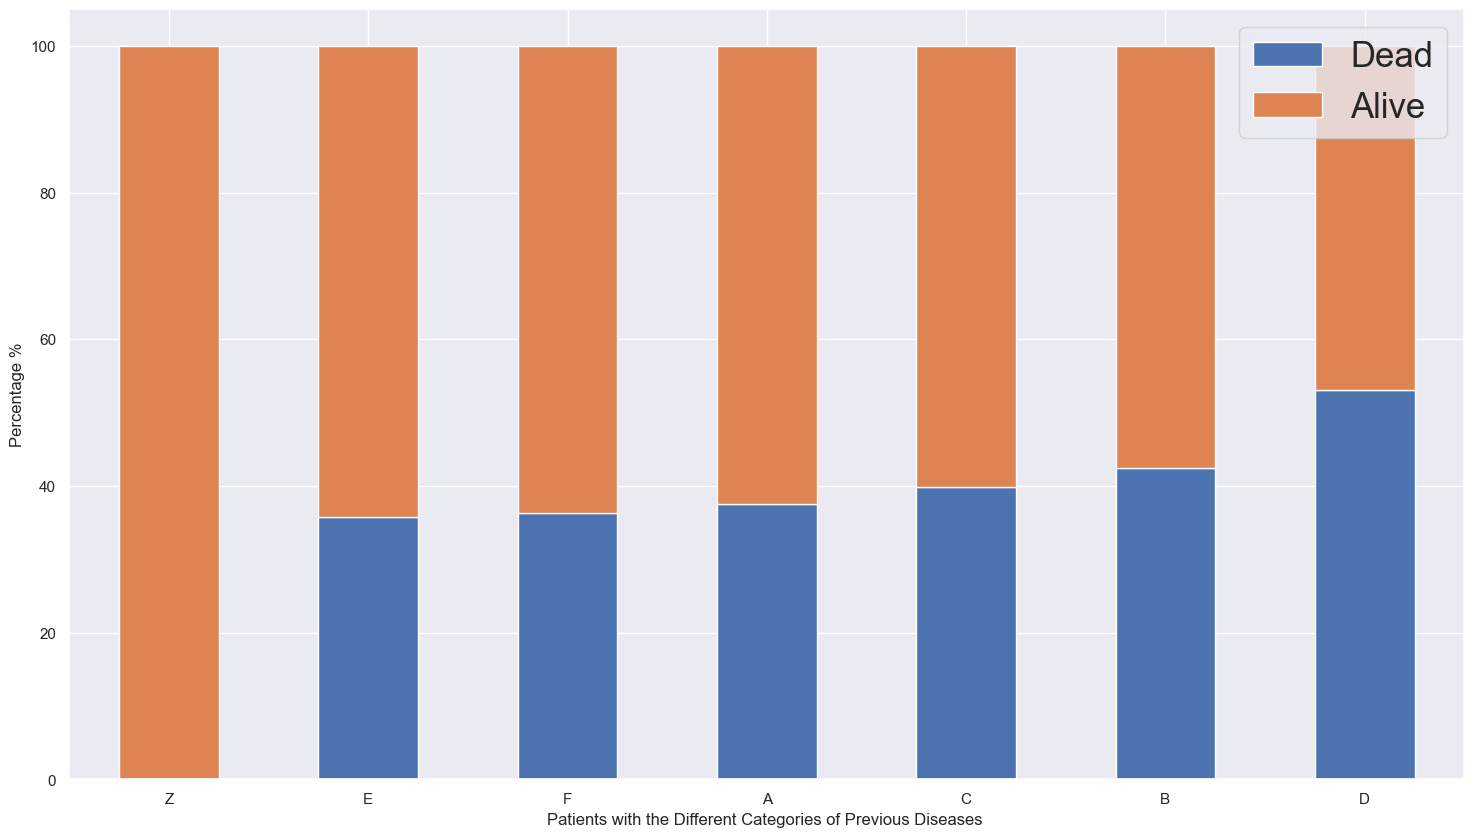

In [988]:
result.plot.bar(stacked = True,rot = 0,figsize=(18,10))
plt.legend(["Dead","Alive"],loc = "upper right",fontsize =25)
plt.ylabel("Percentage %")
plt.xlabel("Patients with the Different Categories of Previous Diseases ")
plt.show()

---
This clearly shows the relationship between the rate of survival and the class of Previous condition they had
- 100% of those with condition Z survived
- 64% of those with condition E survived
- 63% of those with condition F survived

### 7.Treated with Drugs

In [989]:
drugs = pharma_data[["ID_Patient_Care_Situation","Treated_with_drugs","Survived_1_year"]]
drugs.columns = ["id","drugs","Survival"]
drugs_total = drugs.groupby([drugs["drugs"],drugs["Survival"]])["id"].count().unstack()
drugs_percent = (drugs_total.div(drugs_total.sum(axis = 1),axis = 0)*100).sort_values(by = 1,ascending = False)
drugs_percent

Survival,0,1
drugs,,
DX1 DX2 DX3 DX4 DX5,NaN,100.000000
DX1 DX4 DX5,6.250000,93.750000
DX1 DX5,11.691542,88.308458
DX2 DX4 DX5,14.285714,85.714286
DX1 DX2 DX3 DX5,14.285714,85.714286
DX1 DX3 DX5,14.851485,85.148515
DX3 DX5,14.987715,85.012285
DX2 DX3 DX5,16.483516,83.516484
DX3 DX4 DX5,16.494845,83.505155


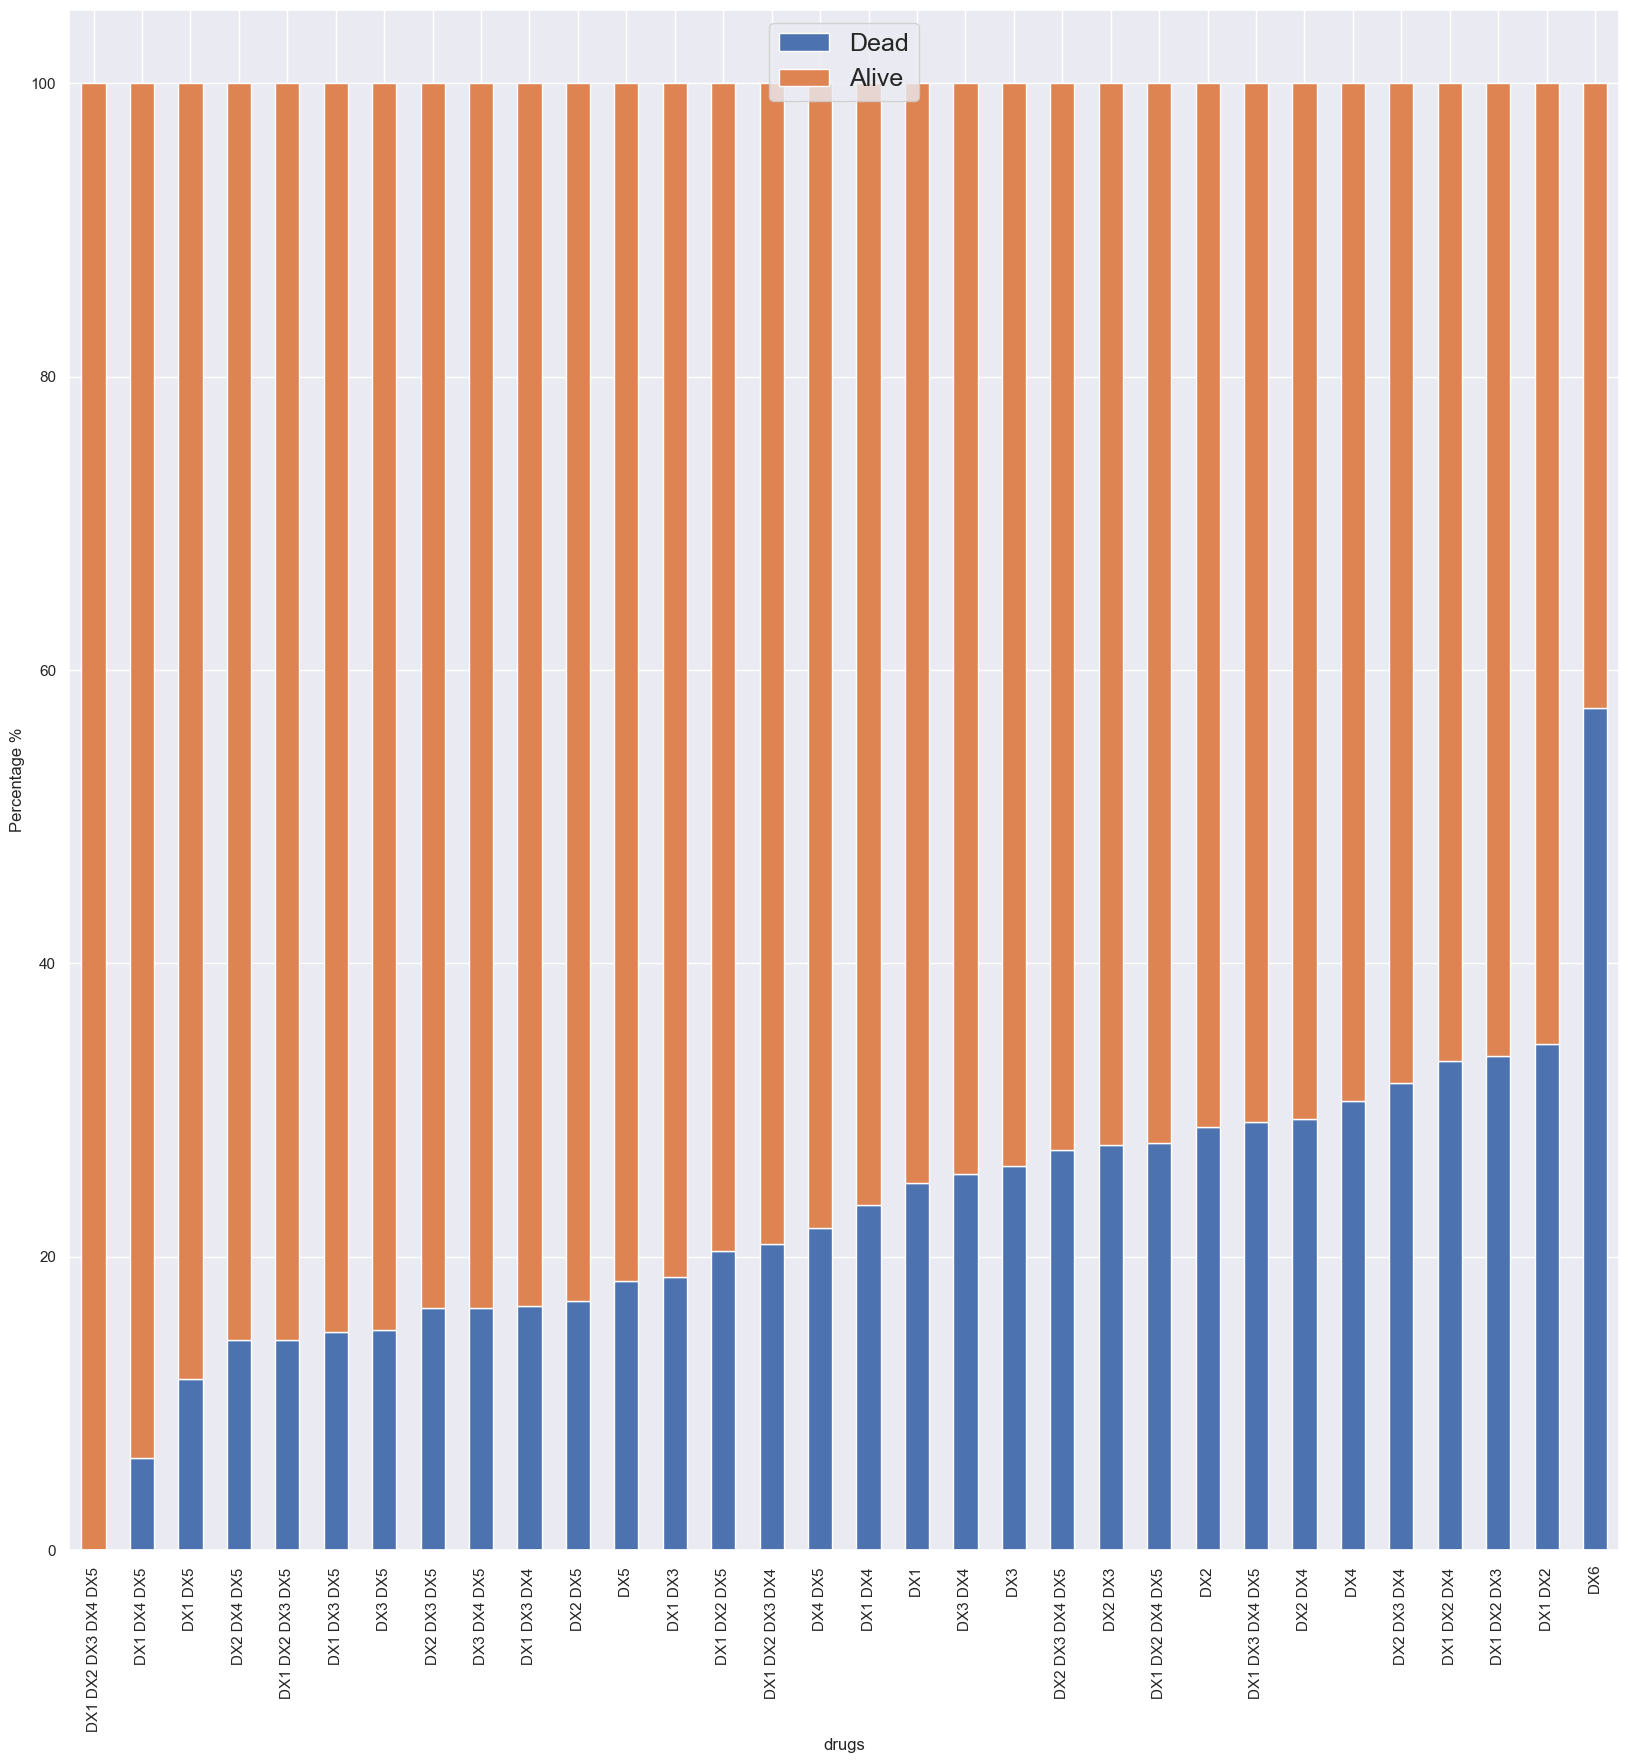

In [990]:
drugs_percent.plot.bar(stacked=True, rot="vertical", figsize=(20, 20))
plt.legend(["Dead", "Alive"], loc="upper center", fontsize=18)
plt.ylabel("Percentage %")
plt.xlabel("drugs")
plt.show()

Class of drugs used during treatment
- DX1 has 74% of Survivors
- DX2 has 71% of Survivors
- DX3 has 73% of Survivors

FOR DRUG COMBINATIONS the top 3 contributors of survivors are;

- DX1,DX2,DX3,DX4,DX5 has 100% survivors
- DX1,DX4,DX5 has 93% survivors
- DX2,DX5 has 88% survivors

### 8.Diagnosed Condition

In [991]:
diagnosed = pharma_data[["ID_Patient_Care_Situation","Diagnosed_Condition","Survived_1_year"]]
diagnosed.columns = ["id","Diagnosed","Survival"]
new_df = pd.DataFrame({"Survived":diagnosed[diagnosed["Survival"]==1]["Diagnosed"],
                    "Died":diagnosed[diagnosed["Survival"]==0]["Diagnosed"]

                    })
new_df

,Survived,Died
0,NaN,8.0
1,5.0,NaN
2,NaN,23.0
3,51.0,NaN
4,0.0,NaN
...,...,...
23092,NaN,3.0
23093,41.0,NaN
23094,NaN,24.0
23095,11.0,NaN


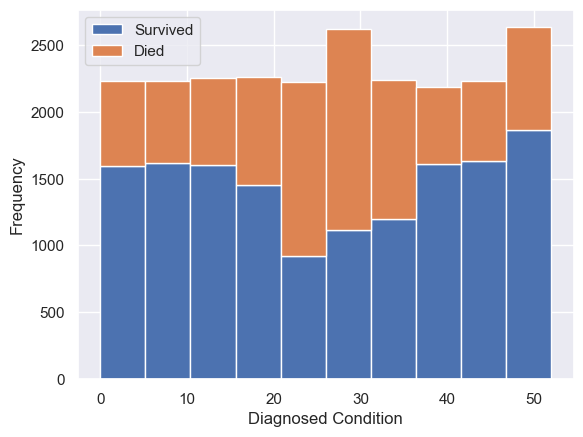

In [992]:
new_df[["Survived","Died"]].plot.hist(stacked = True)
plt.xlabel("Diagnosed Condition")
plt.show()

### 9. Patient Age

In [993]:
age_pd = pharma_data[["ID_Patient_Care_Situation","Patient_Age","Survived_1_year"]]
age_pd.columns = ["id","Age","Survival"]
age = pd.DataFrame({"Survived":age_pd[age_pd["Survival"]==1]["Age"],
                     "Died":age_pd[age_pd["Survival"]==0]["Age"]

})
age

,Survived,Died
0,NaN,56.0
1,36.0,NaN
2,NaN,48.0
3,5.0,NaN
4,128.0,NaN
...,...,...
23092,NaN,14.0
23093,55.0,NaN
23094,NaN,63.0
23095,25.0,NaN


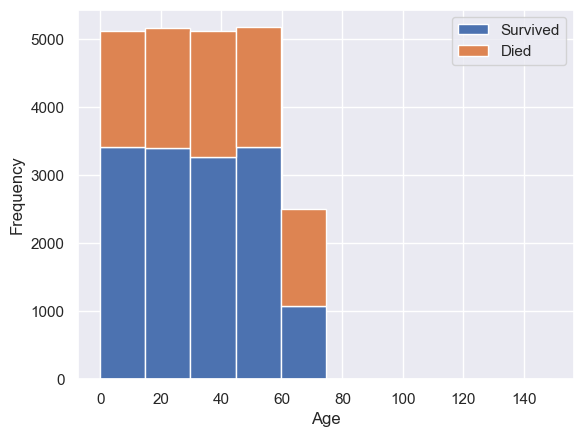

In [994]:
age[["Survived","Died"]].plot.hist(stacked = True)
plt.xlabel("Age")
plt.show()

In [995]:
#We will annotate to see which condition has the most survivors

### 10. Body Mass Ratio

In [996]:
bmr = pharma_data[["ID_Patient_Care_Situation","Patient_Body_Mass_Index","Survived_1_year"]]
bmr.columns = ["id","Patient_Body_Mass_Index","Survival"]
new = pd.DataFrame({"Survived":bmr[bmr["Survival"]==1]["Patient_Body_Mass_Index"],
                     "Died":bmr[bmr["Survival"]==0]["Patient_Body_Mass_Index"]

                     })
new

,Survived,Died
0,NaN,18.479385
1,22.945566,NaN
2,NaN,27.510027
3,19.130976,NaN
4,1.348400,NaN
...,...,...
23092,NaN,18.643448
23093,23.684585,NaN
23094,NaN,27.500039
23095,23.719125,NaN


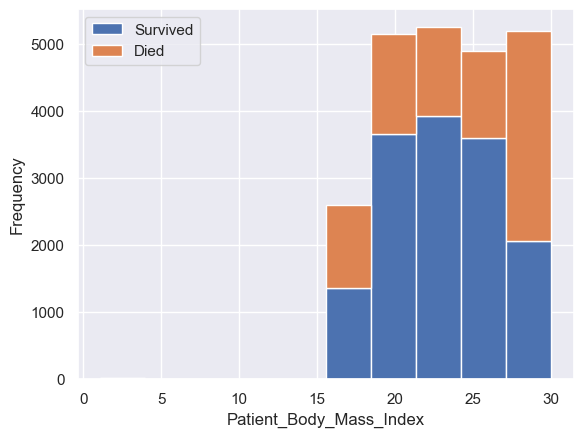

In [997]:
new[["Survived","Died"]].plot.hist(stacked = True)
plt.xlabel("Patient_Body_Mass_Index")
plt.show()

Clearly,`Patient_Body_Mass_Index` and `Patient_Age`data is highly negatively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the left are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution based on a five number summary:
- Minimum
- First quartile (Q1)
- Median
- Third quartile (Q3)
- Maximum

It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

[]

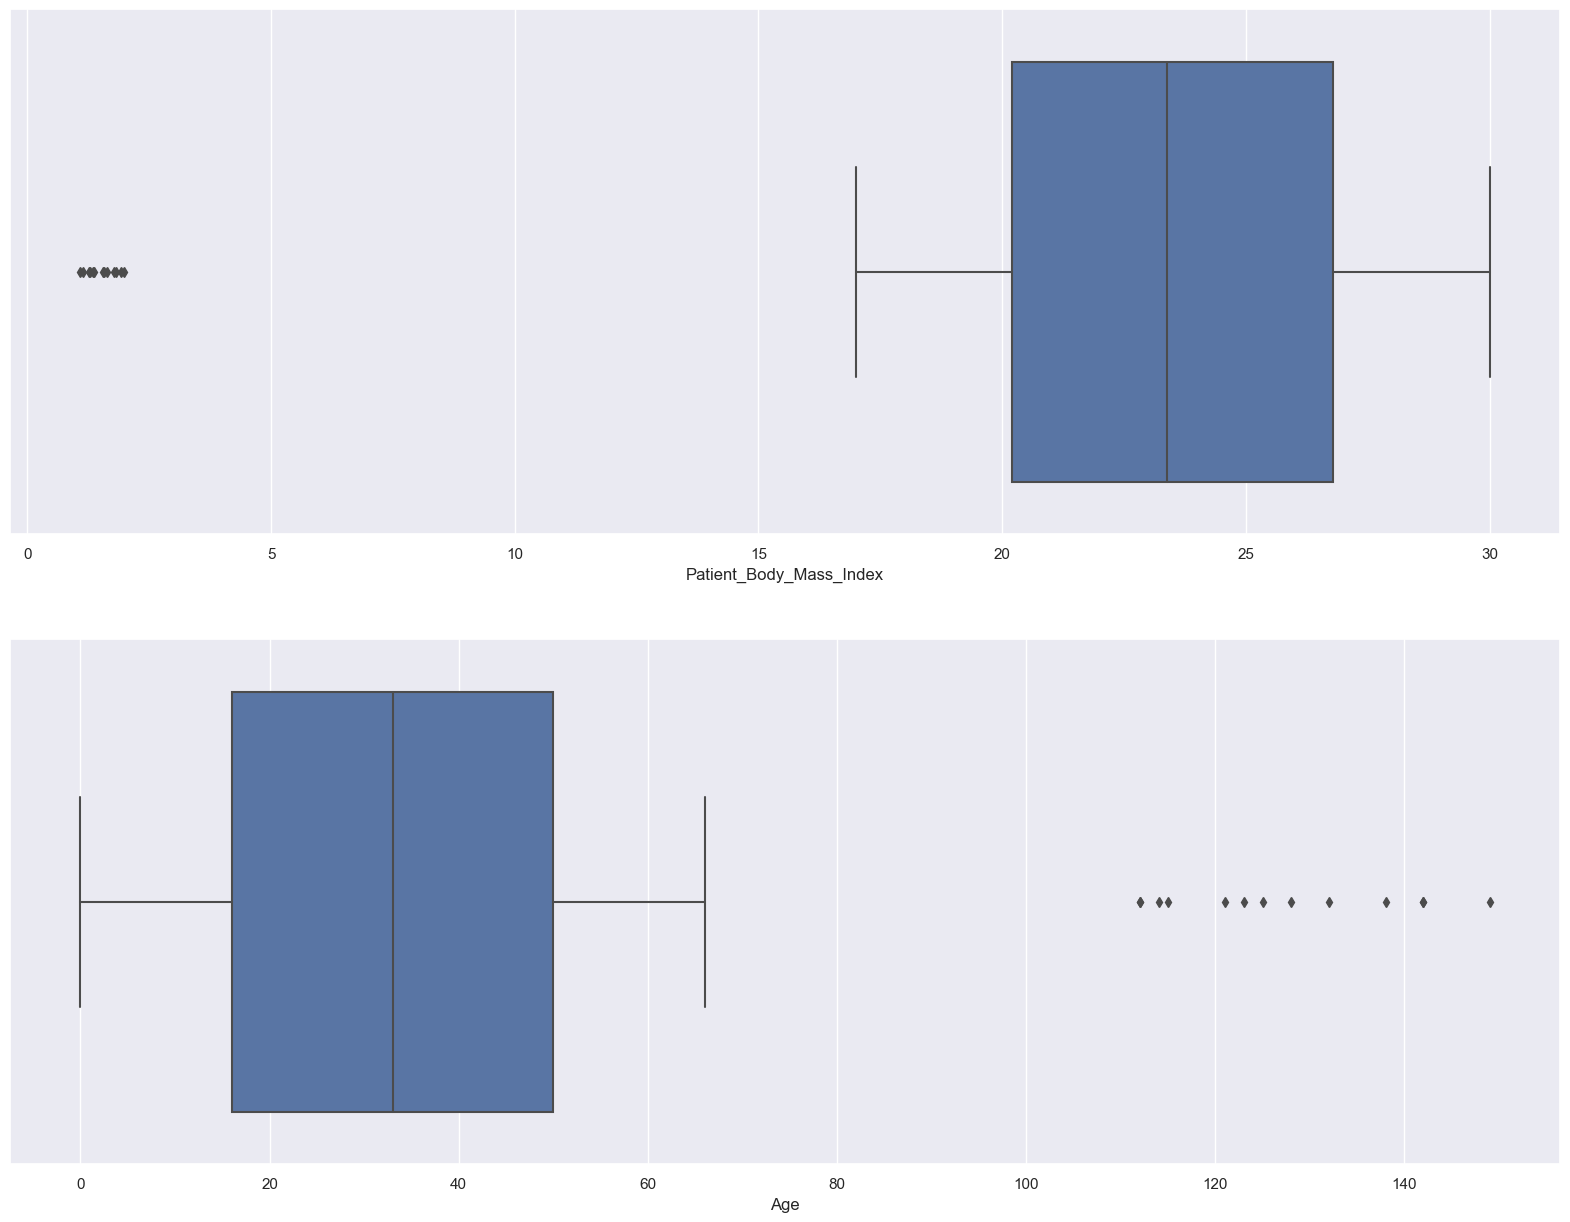

In [998]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Plotting a boxplot
fig, axs = plt.subplots(nrows=2, figsize=(20,15))
sns.boxplot(bmr["Patient_Body_Mass_Index"],ax=axs[0])
sns.boxplot(age_pd["Age"],ax=axs[1])
plt.plot()

Looks like there are outliers and skewness, and we will deal with them in the feature engineering

---
## V. FEATURE ENGINEERING
#### Transforming Boolean Data

In [999]:
pharma_data["Patient_Smoker"] = pharma_data.Patient_Smoker.replace(["YES","NO"],[1,0])

In [1000]:
pharma_data.groupby(["Patient_Smoker"]).agg({"Survived_1_year":"mean"})

,Survived_1_year
Patient_Smoker,
0,0.737355
1,0.490915


It is obvious that being a patient smoker affects their tendency to survive.

#### Transforming numerical data
In EDA some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called parametric models, and they typically assume that all variables are both independent and normally distributed.

Skewness isn’t always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

There are many ways that you can treat skewed variables. You can apply transformations such as:
Square root
Cubic root
Logarithm
 For this use case we will use the ‘Logarithm’ transformation for the positively skewed features.
Note: We cannot apply log to a value of 0, so we will add a constant of 1 to all the values
First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [1001]:
pharma_data[["Patient_Age","Patient_Body_Mass_Index","Diagnosed_Condition"]].describe()

,Patient_Age,Patient_Body_Mass_Index,Diagnosed_Condition
count,23097.000000,23097.000000,23097.000000
mean,33.209768,23.454820,26.413127
std,19.549882,3.807661,15.030865
min,0.000000,1.089300,0.000000
25%,16.000000,20.205550,13.000000
50%,33.000000,23.386199,26.000000
75%,50.000000,26.788154,39.000000
max,149.000000,29.999579,52.000000


In [1002]:
pharma_data["Patient_Age"] = np.log10(pharma_data["Patient_Age"] + 1)
pharma_data["Patient_Body_Mass_Index"] = np.log10(pharma_data["Patient_Body_Mass_Index"] + 1)
pharma_data["Diagnosed_Condition"] = np.log10(pharma_data["Diagnosed_Condition"] + 1)
#Checking the skewness now
pharma_data[["Patient_Age","Patient_Body_Mass_Index","Diagnosed_Condition"]].describe()

,Patient_Age,Patient_Body_Mass_Index,Diagnosed_Condition
count,23097.000000,23097.000000,23097.000000
mean,1.411865,1.382770,1.336863
std,0.396918,0.071844,0.342974
min,0.000000,0.320001,0.000000
25%,1.230449,1.326450,1.146128
50%,1.531479,1.387144,1.431364
75%,1.707570,1.443860,1.602060
max,2.176091,1.491356,1.724276


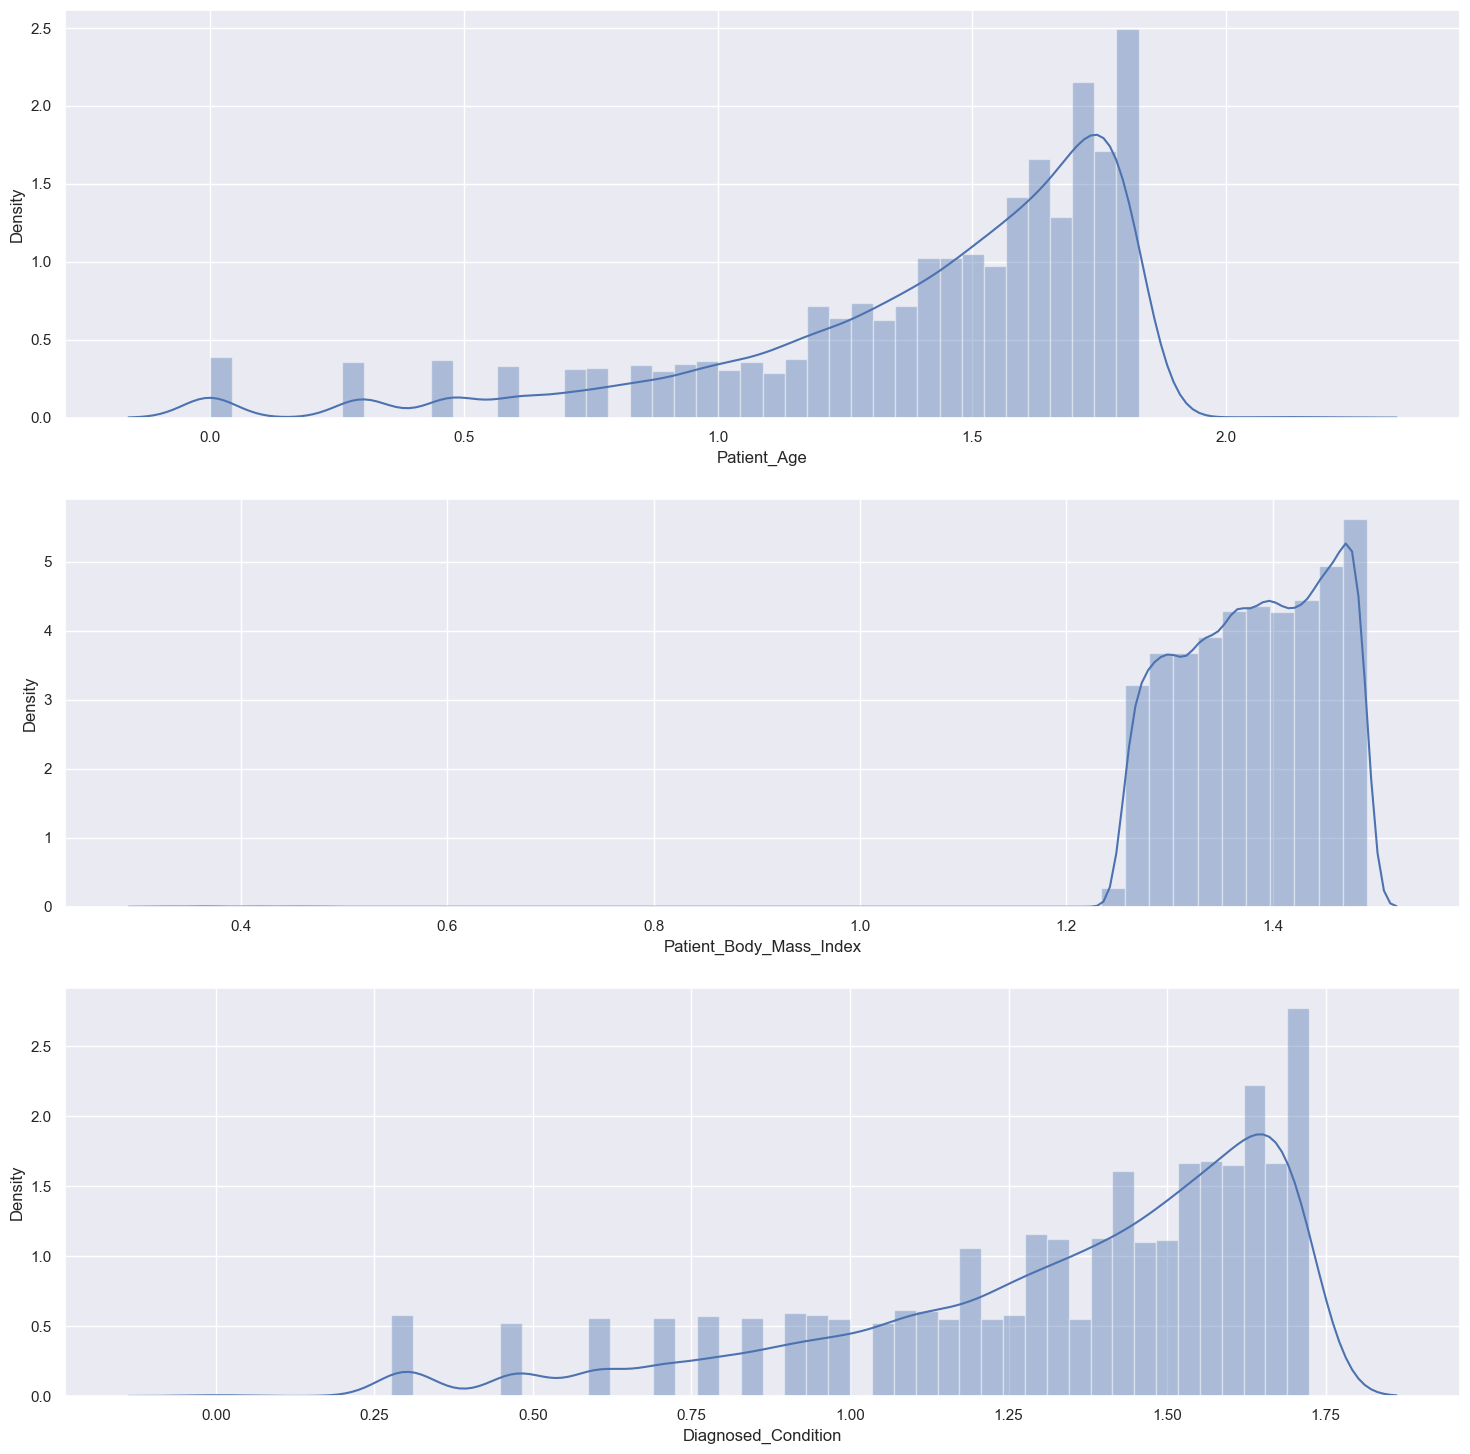

In [1003]:
fig, axs = plt.subplots(nrows=3,figsize=(18,18))
# Plot histograms
sns.distplot((pharma_data["Patient_Age"].dropna()), ax=axs[0])
sns.distplot((pharma_data["Patient_Body_Mass_Index"].dropna()), ax=axs[1])
sns.distplot((pharma_data["Diagnosed_Condition"].dropna()), ax=axs[2])
plt.show()

#### TRANSFORMING CATEGORICAL DATA

A predictive model cannot accept categorical or string values.
The simplest method is to map each category to an integer (label encoding/Ordinal encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present 0 < 1 < 2 < 3 ...
Another way to encode categorical features is to use dummy variables AKA one hot encoding. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

In [1004]:
pharma_data.Patient_Rural_Urban = pharma_data.Patient_Rural_Urban.astype("category")
pharma_data.Treated_with_drugs = pharma_data.Treated_with_drugs.astype("category")
pharma_data.Number_of_prev_cond = pharma_data.Number_of_prev_cond.astype("category")
pharma_data.Diagnosed_Condition = pharma_data.Diagnosed_Condition.astype("category")
pharma_data.Patient_Age = pharma_data.Patient_Age.astype("category")
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,0.954243,3333,DX6,1.755875,1.289575,1,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,0.778151,5740,DX2,1.568202,1.379225,1,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,1.380211,10446,DX6,1.690196,1.454998,1,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,1.716003,12011,DX1,0.778151,1.303865,0,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0.000000,12513,DX1,2.110590,0.370772,1,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,0.602060,1548,DX2 DX4,1.176091,1.293218,0,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,1.623249,2769,DX6,1.748188,1.392426,0,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,1.397940,7671,DX6,1.806180,1.454845,1,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,1.079181,5764,DX3,1.414973,1.393033,1,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [1005]:
pharma_data = pd.get_dummies(pharma_data,columns=["Patient_Rural_Urban",
                                                  "Treated_with_drugs",
                                                  "Number_of_prev_cond",
                                                  "Diagnosed_Condition",
                                                  "Patient_Age"


])
pharma_data

,ID_Patient_Care_Situation,Patient_ID,Patient_Body_Mass_Index,Patient_Smoker,Patient_mental_condition,A,B,C,D,E,...,Patient_Age_2.060697840353612,Patient_Age_2.0644579892269186,Patient_Age_2.0863598306747484,Patient_Age_2.093421685162235,Patient_Age_2.100370545117563,Patient_Age_2.110589710299249,Patient_Age_2.123851640967086,Patient_Age_2.143014800254095,Patient_Age_2.155336037465062,Patient_Age_2.1760912590556813
0,22374,3333,1.289575,1,Stable,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,18164,5740,1.379225,1,Stable,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6283,10446,1.454998,1,Stable,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,5339,12011,1.303865,0,Stable,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,33012,12513,0.370772,1,Stable,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,1548,1.293218,0,Stable,1.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
23093,15503,2769,1.392426,0,Stable,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
23094,2167,7671,1.454845,1,Stable,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
23095,31646,5764,1.393033,1,Stable,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


We have 2 categories, so we will create 2 dummy variables from this column

Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now. Let’s quickly check the distributions of some of these features too.

# MODEL


We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. We are only focused on training a Random Forest classifier.

In [1006]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

### Data sampling
The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

In [1007]:
target = pharma_data["Survived_1_year"]
feature = pharma_data.drop(columns = ["Patient_ID",
                                      "ID_Patient_Care_Situation",
                                      "Survived_1_year",
                                      "Patient_mental_condition"
])

In [1008]:
print(target.shape)
print(feature.shape)

(23097,)
(23097, 179)


In [1009]:
#Divide feature and target into train and test
feature_train,feature_test,target_train,target_test = train_test_split(feature,target,test_size=25,random_state=42)

In [1010]:
print(target_test.shape)
print(feature_test.shape)
print(target_train.shape)
print(feature_train.shape)

(25,)
(25, 179)
(23072,)
(23072, 179)


We are using a Random Forest classifier in this example. A Random Forest sits within the category of ensemble algorithms because internally the Forest refers to a collection of Decision Trees which are tree-based learning algorithms.

In [1011]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(feature_train,target_train)

RandomForestClassifier(n_estimators=1000)

### Evaluation
Now let’s evaluate how well this trained model is able to predict the values of the test dataset. We are going to use 3 metrics to evaluate performance:
- Accuracy = the ratio of correctly predicted observations to the total observations
- Precision = the ability of the classifier to not label a negative sample as positive
- Recall = the ability of the classifier to find all the positive samples
- F1 Score

In [1012]:
prediction = model.predict(feature_test)
tn,fp,fn,tp = metrics.confusion_matrix(target_test,prediction).ravel()

In [1013]:
print(f"True Negative: {tn}")
print(f"True Positive: {tp}")
print(f"False Negative: {fn}")
print(f"False Positive: {fp}")

True Negative: 10
True Positive: 9
False Negative: 2
False Positive: 4


In [1014]:
print(f"Precision: {metrics.precision_score(target_test,prediction)*100}%")
print(f"Accuracy: {metrics.accuracy_score(target_test,prediction)*100}%")
print(f"Recall: {metrics.recall_score(target_test,prediction)*100}%")
print(f"F1 Score: {metrics.f1_score(target_test,prediction)*100}%")

Precision: 69.23076923076923%
Accuracy: 76.0%
Recall: 81.81818181818183%
F1 Score: 75.00000000000001%


In [1026]:
feature_importances = pd.DataFrame({"feature":feature_train.columns,
                                    "importance":model.feature_importances_


}).sort_values(by = "importance",ascending=False).reset_index()
feature_importances

,index,feature,importance
0,0,Patient_Body_Mass_Index,1.850966e-01
1,42,Treated_with_drugs_DX6,9.116273e-02
2,1,Patient_Smoker,6.666744e-02
3,5,D,1.557461e-02
4,6,E,1.515629e-02
...,...,...,...
174,176,Patient_Age_2.143014800254095,1.436026e-06
175,174,Patient_Age_2.110589710299249,1.283553e-06
176,169,Patient_Age_2.060697840353612,1.164860e-06
177,178,Patient_Age_2.1760912590556813,1.065596e-06


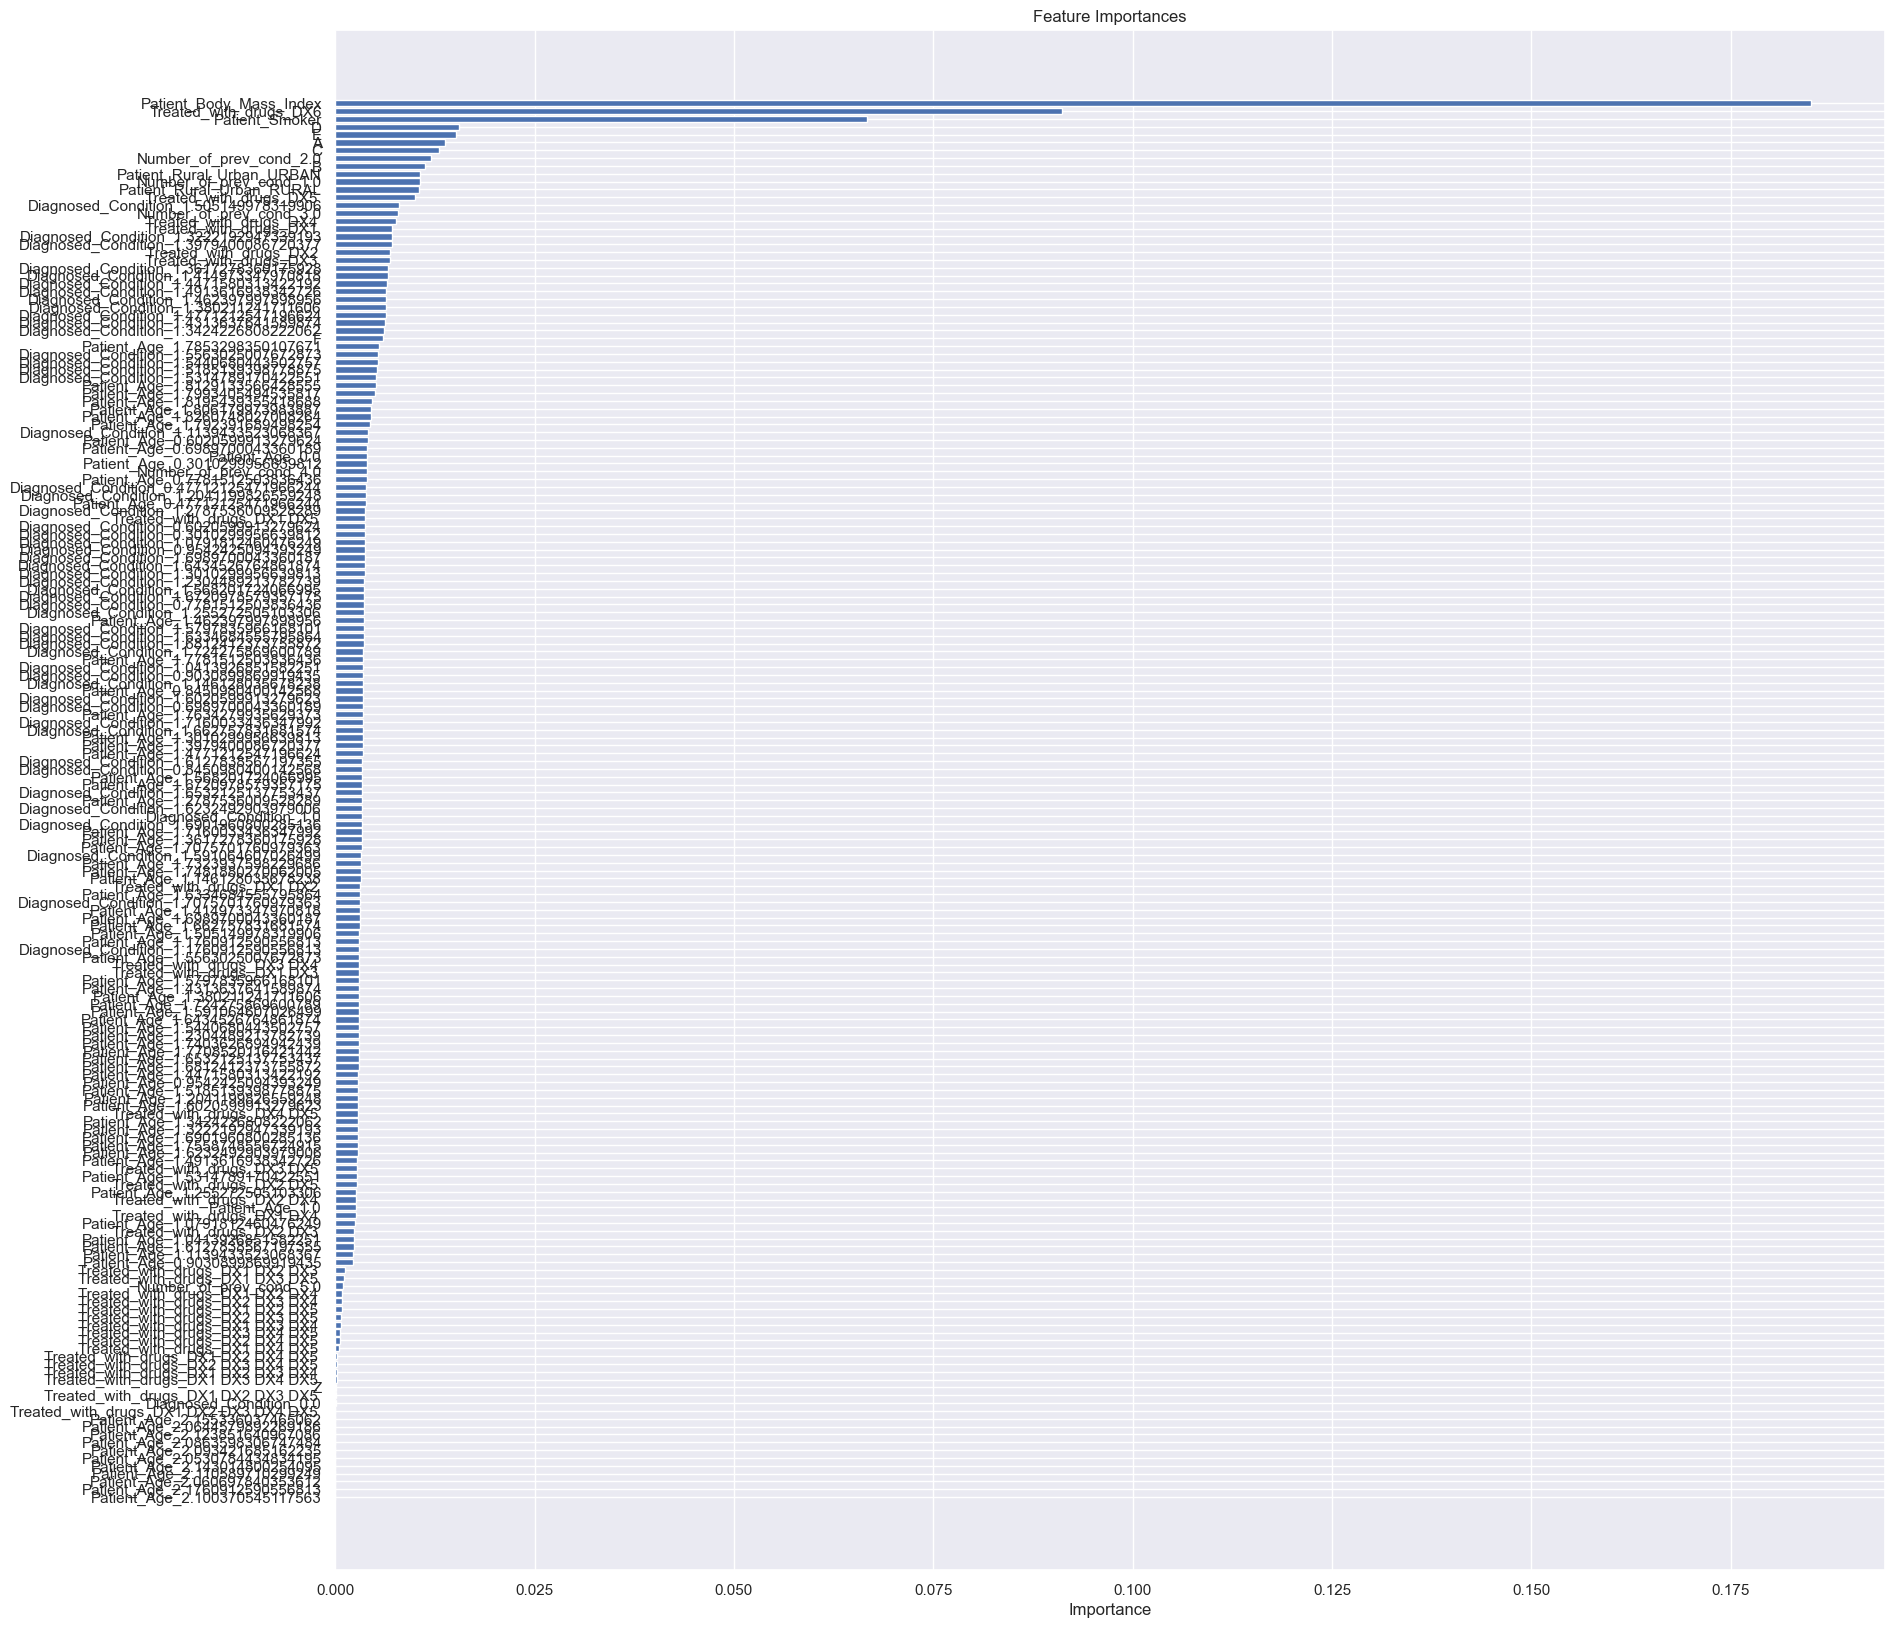

In [1025]:
plt.figure(figsize=(20, 20))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b')
plt.yticks(range(len(feature_importances)), feature_importances['feature'])
plt.xlabel('Importance')
plt.show()